# Bibliotecas e datasets iniciais

In [119]:
import math
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [153]:
df_bts = pd.read_csv('../../project_files/03_processed_files/bts.csv', delimiter=',', encoding='utf-8', index_col=False)
df_train = pd.read_csv('../../project_files/03_processed_files/meds_train_alunos.csv', delimiter=',', encoding='utf-8', index_col=False)

# Visualizando as informações básicas dos datasets

## BTSs

In [154]:
df_bts = df_bts.iloc[:, 2:].drop(columns=['id_bts', 'nom_bts', 'nom_canal_controle_bts'])

In [155]:
df_bts

,id_localizacao_setor,num_lat_bts,num_long_bts,num_azimuth,id_rrsi
0,1,-8.04342,-34.952000,0,rssi_1_1
1,1,-8.04342,-34.952000,120,rssi_1_2
2,1,-8.04342,-34.952000,240,rssi_1_3
3,2,-8.05289,-34.944672,0,rssi_2_1
4,2,-8.05289,-34.944672,120,rssi_2_2
5,2,-8.05289,-34.944672,240,rssi_2_3
6,3,-8.05532,-34.957900,0,rssi_3_1
7,3,-8.05532,-34.957900,120,rssi_3_2
8,3,-8.05532,-34.957900,240,rssi_3_3


# Train DF

In [156]:
df_train = df_train.iloc[:,2:]

In [157]:
df_train['rd_1'] = 0.0 # distância real para as bts de setor 1
df_train['rd_2'] = 0.0 # distância real para as bts de setor 2
df_train['rd_3'] = 0.0 # distância real para as bts de setor 3
df_train

,id_ponto,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,num_lat_bts,num_long_bts,flag_indoor,rd_1,rd_2,rd_3
0,6604,-103.705000,-110.425000,-107.381667,-110.330000,-108.345000,-106.590000,-107.153333,-102.120000,-115.0000,5.0,3.0,2.0,-8.055786,-34.951505,1,0.0,0.0,0.0
1,5515,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-88.470000,-94.024286,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,1,0.0,0.0,0.0
2,5049,-102.610000,-115.000000,-101.380000,-115.000000,-104.295000,-97.360000,-96.980000,-99.572500,-115.0000,5.0,3.0,2.0,-8.055506,-34.951693,1,0.0,0.0,0.0
3,8737,-89.140000,-97.251429,-86.642857,-96.036667,-96.592500,-92.460000,-86.813333,-102.688000,-87.2700,4.0,7.0,2.0,-8.050390,-34.959630,0,0.0,0.0,0.0
4,1203,-109.088333,-107.200000,-107.010000,-108.430000,-104.845714,-101.435714,-103.065000,-102.110000,-115.0000,5.0,3.0,2.0,-8.055380,-34.951736,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6758,5734,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-93.005000,-97.114286,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,1,0.0,0.0,0.0
6759,5191,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-87.315000,-88.735714,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,1,0.0,0.0,0.0
6760,5390,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-95.165000,-90.705714,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,1,0.0,0.0,0.0
6761,860,-109.088333,-107.200000,-107.010000,-108.430000,-97.200000,-98.148571,-99.840000,-94.665000,-115.0000,5.0,3.0,2.0,-8.055380,-34.951736,1,0.0,0.0,0.0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6763 entries, 0 to 6762
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rssi_1_1      6763 non-null   float64
 1   rssi_1_2      6763 non-null   float64
 2   rssi_1_3      6763 non-null   float64
 3   rssi_2_1      6763 non-null   float64
 4   rssi_2_2      6763 non-null   float64
 5   rssi_2_3      6763 non-null   float64
 6   rssi_3_1      6763 non-null   float64
 7   rssi_3_2      6763 non-null   float64
 8   rssi_3_3      6763 non-null   float64
 9   delay_1       6763 non-null   float64
 10  delay_2       6763 non-null   float64
 11  delay_3       6763 non-null   float64
 12  num_lat_bts   6763 non-null   float64
 13  num_long_bts  6763 non-null   float64
 14  flag_indoor   6763 non-null   int64  
 15  rd_1          6763 non-null   float64
 16  rd_2          6763 non-null   float64
 17  rd_3          6763 non-null   float64
dtypes: float64(17), int64(1)
mem

In [8]:
def ED(lat1 : float, lon1 : float, lat2 : float, lon2 : float): #  coordenadas dos pontos e das torres
  """Calcula a distância em quilômetros entre as coordenadas de um dos pontos e uma das torres
  usando a distância haversine"""
  earth_radius = 6371.0 * 1000

  # Converte latitude e longitude de graus para radianos
  lat1_rad = math.radians(lat1)
  lon1_rad = math.radians(lon1)
  lat2_rad = math.radians(lat2)
  lon2_rad = math.radians(lon2)

  # Fórmula Haversine
  dlat = lat2_rad - lat1_rad
  dlon = lon2_rad - lon1_rad
  a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

  # Calcula a distância
  distance = earth_radius * c

  return distance

In [158]:
for i in range(df_train.shape[0]):
  df_train.loc[i, 'rd_1'] = ED(df_train.loc[i, 'num_lat_bts'], df_train.loc[i, 'num_long_bts'], df_bts.loc[0, 'num_lat_bts'], df_bts.loc[0, 'num_long_bts']) 
  df_train.loc[i, 'rd_2'] = ED(df_train.loc[i, 'num_lat_bts'], df_train.loc[i, 'num_long_bts'], df_bts.loc[3, 'num_lat_bts'], df_bts.loc[3, 'num_long_bts'])
  df_train.loc[i, 'rd_3'] = ED(df_train.loc[i, 'num_lat_bts'], df_train.loc[i, 'num_long_bts'], df_bts.loc[6, 'num_lat_bts'], df_bts.loc[6, 'num_long_bts'])

In [159]:
df_train

,id_ponto,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,num_lat_bts,num_long_bts,flag_indoor,rd_1,rd_2,rd_3
0,6604,-103.705000,-110.425000,-107.381667,-110.330000,-108.345000,-106.590000,-107.153333,-102.120000,-115.0000,5.0,3.0,2.0,-8.055786,-34.951505,1,1376.116069,818.323014,705.979147
1,5515,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-88.470000,-94.024286,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,1,1375.491341,828.673816,694.653615
2,5049,-102.610000,-115.000000,-101.380000,-115.000000,-104.295000,-97.360000,-96.980000,-99.572500,-115.0000,5.0,3.0,2.0,-8.055506,-34.951693,1,1344.326875,825.918687,683.689740
3,8737,-89.140000,-97.251429,-86.642857,-96.036667,-96.592500,-92.460000,-86.813333,-102.688000,-87.2700,4.0,7.0,2.0,-8.050390,-34.959630,0,1142.968177,1670.154895,580.338100
4,1203,-109.088333,-107.200000,-107.010000,-108.430000,-104.845714,-101.435714,-103.065000,-102.110000,-115.0000,5.0,3.0,2.0,-8.055380,-34.951736,1,1330.208922,825.547524,678.675535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6758,5734,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-93.005000,-97.114286,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,1,1375.491341,828.673816,694.653615
6759,5191,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-87.315000,-88.735714,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,1,1375.491341,828.673816,694.653615
6760,5390,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-95.165000,-90.705714,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,1,1375.491341,828.673816,694.653615
6761,860,-109.088333,-107.200000,-107.010000,-108.430000,-97.200000,-98.148571,-99.840000,-94.665000,-115.0000,5.0,3.0,2.0,-8.055380,-34.951736,1,1330.208922,825.547524,678.675535


In [11]:
df_train.loc[0, 'rd_1']

1376.116068685217

In [12]:
cormat = df_train.corr()
round(cormat, 2)

,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,num_lat_bts,num_long_bts,flag_indoor,rd_1,rd_2,rd_3
rssi_1_1,1.00,0.79,0.94,0.69,0.59,0.58,0.31,-0.12,0.76,-0.50,0.29,0.19,0.62,-0.23,-0.82,-0.55,0.30,0.15
rssi_1_2,0.79,1.00,0.76,0.84,0.61,0.61,0.25,-0.05,0.70,-0.57,0.05,0.46,0.69,0.05,-0.86,-0.63,0.06,0.42
rssi_1_3,0.94,0.76,1.00,0.65,0.58,0.58,0.28,-0.14,0.74,-0.50,0.31,0.19,0.61,-0.25,-0.80,-0.55,0.32,0.14
rssi_2_1,0.69,0.84,0.65,1.00,0.70,0.67,0.19,-0.03,0.59,-0.47,-0.21,0.50,0.58,0.23,-0.77,-0.53,-0.21,0.48
rssi_2_2,0.59,0.61,0.58,0.70,1.00,0.88,0.15,0.10,0.35,-0.16,-0.15,0.43,0.23,0.20,-0.51,-0.20,-0.18,0.31
rssi_2_3,0.58,0.61,0.58,0.67,0.88,1.00,0.21,0.12,0.39,-0.18,-0.03,0.39,0.29,0.09,-0.54,-0.23,-0.05,0.25
rssi_3_1,0.31,0.25,0.28,0.19,0.15,0.21,1.00,0.63,0.58,-0.15,0.38,-0.11,0.24,-0.37,-0.52,-0.16,0.40,-0.19
rssi_3_2,-0.12,-0.05,-0.14,-0.03,0.10,0.12,0.63,1.00,0.18,0.26,0.09,-0.14,-0.24,-0.08,-0.16,0.26,0.09,-0.25
rssi_3_3,0.76,0.70,0.74,0.59,0.35,0.39,0.58,0.18,1.00,-0.34,0.47,0.01,0.54,-0.41,-0.89,-0.39,0.50,-0.03
delay_1,-0.50,-0.57,-0.50,-0.47,-0.16,-0.18,-0.15,0.26,-0.34,1.00,0.05,-0.51,-0.93,-0.12,0.52,0.98,0.03,-0.53


<AxesSubplot:>

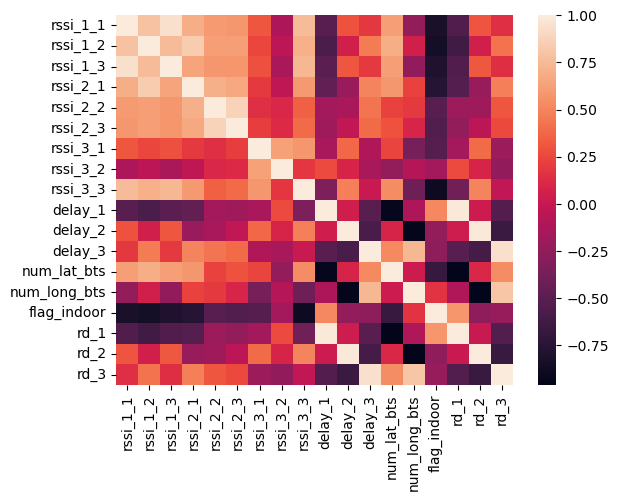

In [13]:
sns.heatmap(cormat)

In [160]:
# scaling the dataset
scaler = MinMaxScaler()

In [161]:
X = df_train.drop(columns=['id_ponto','num_lat_bts', 'num_long_bts', 'rd_1', 'rd_2', 'rd_3'])

In [162]:
scaled_df_train = scaler.fit_transform(X)
scaled_df_train

array([[0.21064901, 0.09117178, 0.14014594, ..., 0.42857143, 0.28571429,
        1.        ],
       [0.18230138, 0.        , 0.18009566, ..., 0.42857143, 0.28571429,
        1.        ],
       [0.2310705 , 0.        , 0.25055188, ..., 0.42857143, 0.28571429,
        1.        ],
       ...,
       [0.18230138, 0.        , 0.18009566, ..., 0.42857143, 0.28571429,
        1.        ],
       [0.11025115, 0.15544041, 0.14698308, ..., 0.42857143, 0.28571429,
        1.        ],
       [0.48015133, 0.46059899, 0.47282666, ..., 0.42857143, 0.42857143,
        0.        ]])

In [163]:
tv = [] # train vector composed of X_train, X_test, y_train, y_test for each bts cluster
for i in range(3):
  X_train, X_test, y_train, y_test = train_test_split(scaled_df_train, df_train.iloc[:, 16 + i], test_size=0.25, random_state=13)
  tv.append((X_train, X_test, y_train, y_test))

# Proposed algorithm
1. Try knn, decision trees, random forests, polynomial regression and Gradient Descent Regression to predict the distance from the point to each of the BTSs
2. After selecting the best algorithm, we can use an optimization technique to minimize a function that is the sum of the differences for each of the predicted distances to (x,y) estimated with a Brute Force Approach and select the x and y wich minimize its functions

## 1. knn

In [17]:
# finding best k
acc = []
for k in range(1, 101):
  local_acc = 0
  for X_train, X_test, y_train, y_test in tv:
    neigh = KNeighborsRegressor(n_neighbors = k, algorithm='brute', metric='euclidean').fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    local_acc += metrics.mean_squared_error(y_test, yhat)
  acc.append(local_acc/3)

MSE:- 239.803016765794 at K = 2


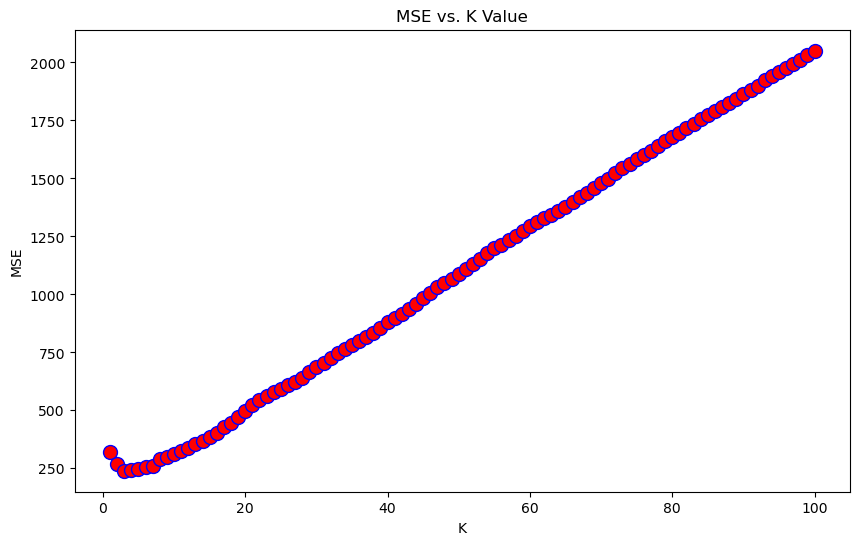

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,101),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('MSE vs. K Value')
plt.xlabel('K')
plt.ylabel('MSE')
print("MSE:-",min(acc),"at K =",acc.index(min(acc)))

In [19]:
for k in [1, 2, 3, 9,41, 71]:
  local_acc = 0
  for X_train, X_test, y_train, y_test in tv:
    neigh = KNeighborsRegressor(n_neighbors = k, algorithm='brute', metric='manhattan').fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    local_acc += metrics.mean_squared_error(y_test, yhat)
  print(f"Error: {local_acc/3}, K:{k}")

Error: 142.1929139886856, K:1
Error: 124.3419134679114, K:2
Error: 131.31175258805118, K:3
Error: 178.351469018899, K:9
Error: 774.2097161629067, K:41
Error: 1531.3805589305832, K:71


## 2. decision trees

In [20]:
acc = []
for depth in range(4, 20):
  local_acc = 0
  for X_train, X_test, y_train, y_test in tv:
    tree = DecisionTreeRegressor(max_depth=depth).fit(X_train, y_train)
    yhat = tree.predict(X_test)
    local_acc += metrics.mean_squared_error(y_test, yhat)
  acc.append(local_acc/3)

MSE:- 396.9037116376415 at Depth = 11


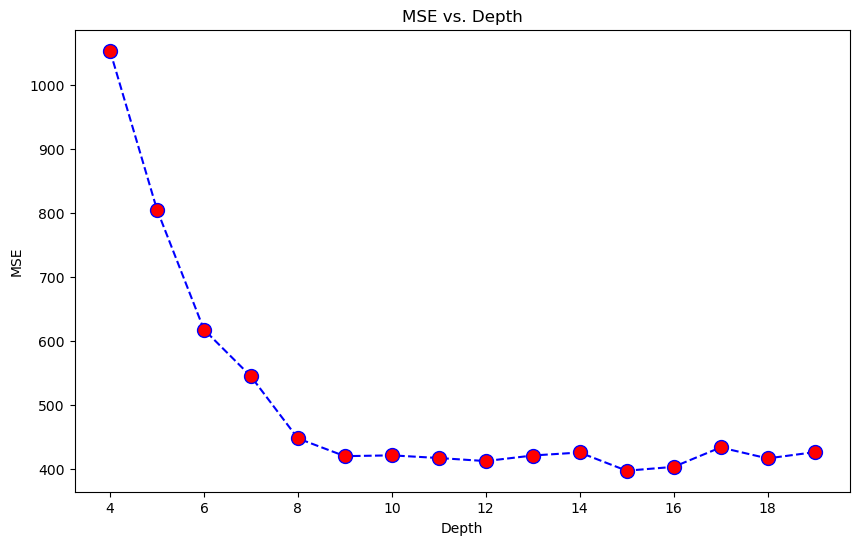

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(4,20),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('MSE vs. Depth')
plt.xlabel('Depth')
plt.ylabel('MSE')
print("MSE:-",min(acc),"at Depth =",acc.index(min(acc)))

In [22]:
acc = []
for k in range(1, 20):
  local_acc = 0
  for X_train, X_test, y_train, y_test in tv:
    tree = DecisionTreeRegressor(min_samples_split=k*0.01).fit(X_train, y_train)
    yhat = tree.predict(X_test)
    local_acc += metrics.mean_squared_error(y_test, yhat)
  acc.append(local_acc/3)

MSE:- 509.8935118198299 at '%_Min_splits' = 0


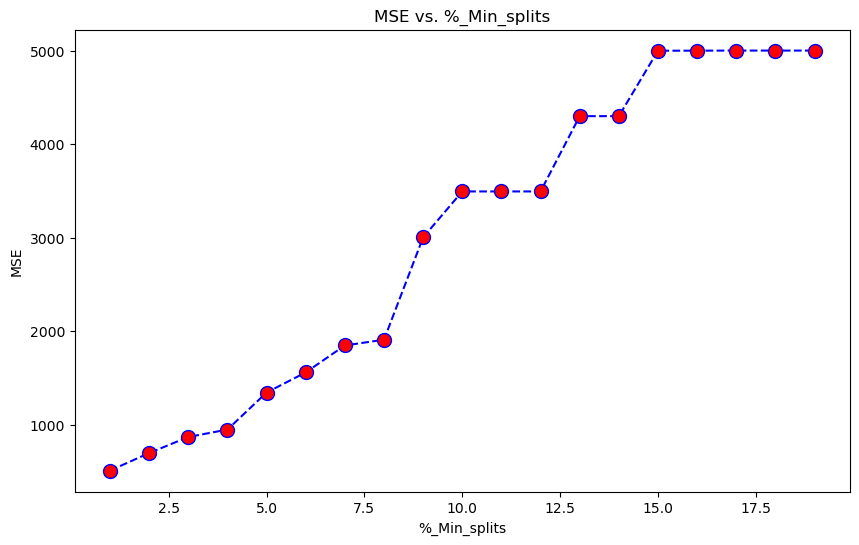

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('MSE vs. %_Min_splits')
plt.xlabel('%_Min_splits')
plt.ylabel('MSE')
print("MSE:-",min(acc),"at '%_Min_splits' =",acc.index(min(acc)))

In [24]:
acc = []
for k in range(1, 15):
  local_acc = 0
  for X_train, X_test, y_train, y_test in tv:
    tree = DecisionTreeRegressor(min_samples_leaf=k*0.01).fit(X_train, y_train)
    yhat = tree.predict(X_test)
    local_acc += metrics.mean_squared_error(y_test, yhat)
  acc.append(local_acc/3)

MSE:- 916.3809565716497 at '%_Min_samples_leaf' = 1


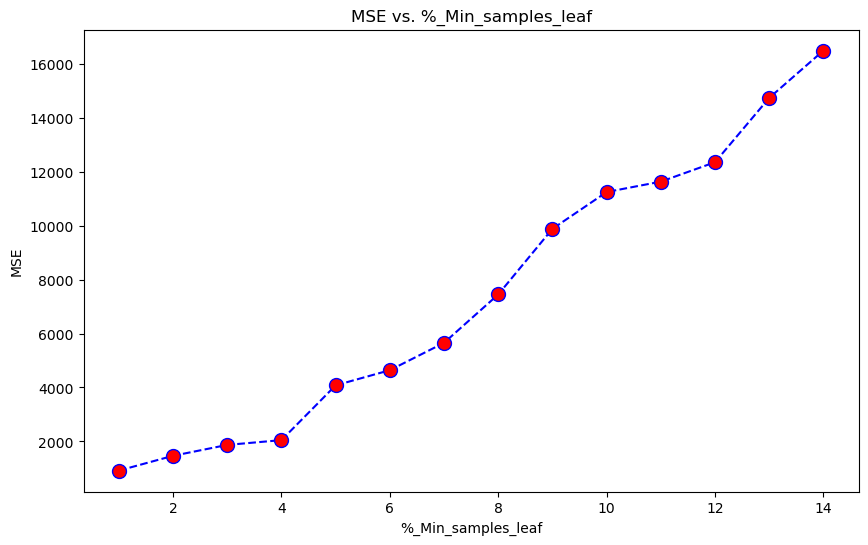

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('MSE vs. %_Min_samples_leaf')
plt.xlabel('%_Min_samples_leaf')
plt.ylabel('MSE')
print("MSE:-",min(acc),"at '%_Min_samples_leaf' =",acc.index(min(acc))+ 1)

In [26]:
mee = 1e6
best_depth, best_min_split, best_min_leaf = 0, 0, 0
for depth in range(9, 18):
  for min_split in range(1, 20):
    for min_leaf in range(1,15):
      err = 0
      for X_train, X_test, y_train, y_test in tv:
        tree = DecisionTreeRegressor(max_depth=depth, min_samples_split=min_split*0.01, min_samples_leaf=min_leaf*0.01).fit(X_train, y_train)
        yhat = tree.predict(X_test)
        err += metrics.mean_squared_error(y_test, yhat)
      acc.append(err/3)
      if err < mee:
        mee = err
        best_depth, best_min_split, best_min_leaf = depth, min_split, min_leaf
print(f'best depth: {best_depth}, best split: {best_min_split}%, best leaf %: {best_min_leaf}%')

best depth: 10, best split: 2%, best leaf %: 1%


In [27]:
err = 0
for X_train, X_test, y_train, y_test in tv:
  tree = DecisionTreeRegressor(max_depth=14).fit(X_train, y_train)
  yhat = tree.predict(X_test)
  err += metrics.mean_squared_error(y_test, yhat)
print(f"Error: {err/3}")

Error: 394.7385397265445


## 3. random forests

In [28]:
acc = []
for depth in range(9, 18):
  local_acc = 0
  for X_train, X_test, y_train, y_test in tv:
    tree = RandomForestRegressor(max_depth=depth).fit(X_train, y_train)
    yhat = tree.predict(X_test)
    local_acc += metrics.mean_squared_error(y_test, yhat)
  acc.append(local_acc/3)

MSE:- 208.0002003333004 at Depth = 15


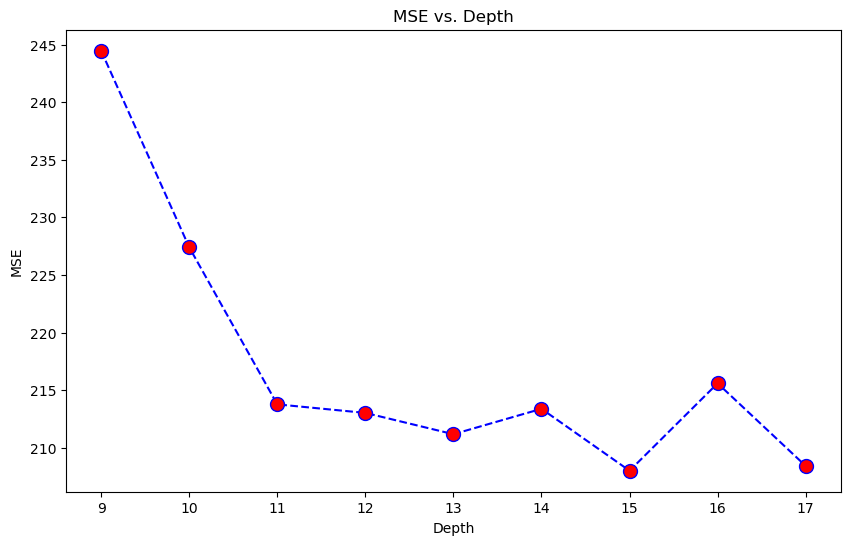

In [86]:
plt.figure(figsize=(10,6))
plt.plot(range(9,18),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('MSE vs. Depth')
plt.xlabel('Depth')
plt.ylabel('MSE')
print("MSE:-",min(acc),"at Depth =",acc.index(min(acc)) + 9)

## 4. polynomial regression

In [78]:
polynomial_converter=PolynomialFeatures(degree=3, include_bias=True)

In [79]:
poly_features = polynomial_converter.fit_transform(X)
polymodel = LinearRegression()

In [80]:
pv = [] # train vector composed of X_train, X_test, y_train, y_test for each bts cluster
for i in range(3):
  X_train, X_test, y_train, y_test = train_test_split(poly_features, df_train.iloc[:, 15 + i], test_size=0.25, random_state=13)
  pv.append((X_train, X_test, y_train, y_test))

In [81]:
local_err = 0
for X_train, X_test, y_train, y_test in pv:
  tree = polymodel.fit(X_train, y_train)
  yhat = tree.predict(X_test)
  local_err += metrics.mean_squared_error(y_test, yhat)
print(local_err)

2129.2006238115277


## Calculating with trilateration

In [109]:
def lat_lon_to_rectangular(lat, lon):
    # Radius of the Earth (mean value) in meters
    earth_radius = 6371000.0
    
    # Convert latitude and longitude from degrees to radians
    lat_rad = math.radians(lat)
    lon_rad = math.radians(lon)
    
    # Calculate x and y coordinates using Mercator projection
    x = earth_radius * lon_rad
    y = earth_radius * math.log(math.tan(math.pi / 4 + lat_rad / 2))
    
    return x, y

In [174]:
def rectangular_to_lat_lon(x, y):
    # Radius of the Earth (mean value) in meters
    earth_radius = 6371000.0
    
    # Calculate longitude (lambda) in radians
    lon_rad = math.atan2(x, y)
    
    # Calculate hypotenuse distance (r) in the xy plane
    r = math.sqrt(x**2 + y**2)
    
    # Calculate latitude (phi) in radians
    lat_rad = math.atan2(y, r)
    
    # Convert latitude and longitude from radians to degrees
    lat_deg = math.degrees(lat_rad)
    lon_deg = math.degrees(lon_rad)
    
    return lat_deg, lon_deg

In [172]:
bts_cords = [
  [*lat_lon_to_rectangular(df_bts.loc[0, 'num_lat_bts'], df_bts.loc[0, 'num_long_bts'])],
  [*lat_lon_to_rectangular(df_bts.loc[3, 'num_lat_bts'],df_bts.loc[3, 'num_long_bts'])],
  [*lat_lon_to_rectangular(df_bts.loc[6, 'num_lat_bts'],df_bts.loc[6, 'num_long_bts'])]
]

In [173]:
bts_cords

[[-3886485.0760806166, -897339.7762058176],
 [-3885670.2396581653, -898403.2667475431],
 [-3887141.12614782, -898676.1622042521]]

In [121]:
def calculate_coordinates(bts, dists):
  def optf(args, bts, dists): # optimize function
    soma = 0
    r, theta = args
    for xi, yi, d in zip(bts, dists):
      soma += abs(d - math.sqrt((r * math.cos(theta) - xi)**2 + ((r * math.sin(theta) - yi)**2)))
    return -soma
  
  # define constraints
  r_min, r_max = bts[0][2] * (i), bts[0][2] * (i+1)
  
  # define constraints for r
  constraints = (
    {'type': 'ineq', 'fun': lambda params: params[0] - r_min},  # r >= r_min
    {'type': 'ineq', 'fun': lambda params: r_max - params[0]},  # r <= r_max
  )

  # Define initial guess for r and beta
  initial_guess = [1.0, 0.0]
  # Call the minimize function
  result = minimize(optf, initial_guess, args=(bts, dists), constraints=constraints, method='SLSQP')
  # Extract the optimized values of r and beta
  optimized_r, optimized_beta = result.x
  return optimized_r, optimized_beta

In [139]:
X_col = list(df_train.drop(columns=['id_ponto','num_lat_bts', 'num_long_bts', 'rd_1', 'rd_2', 'rd_3']).columns)
X_col

['rssi_1_1',
 'rssi_1_2',
 'rssi_1_3',
 'rssi_2_1',
 'rssi_2_2',
 'rssi_2_3',
 'rssi_3_1',
 'rssi_3_2',
 'rssi_3_3',
 'delay_1',
 'delay_2',
 'delay_3',
 'flag_indoor']

In [166]:
print(scaled_df_train[0])

[0.21064901 0.09117178 0.14014594 0.05984111 0.11920115 0.14495002
 0.10488204 0.13841282 0.         0.57142857 0.42857143 0.28571429
 1.        ]


In [164]:
modelos = []
for X_train, X_test, y_train, y_test in tv:
    modelos.append(RandomForestRegressor(max_depth=15).fit(X_train, y_train))

In [ ]:
submit_df = pd.DataFrame(columns= ['ex_lat, ex_lon, pred_lat, pred_lon'])

In [150]:
for i in range(df_train.shape[0]):
  dicio = dict()
  for c, v in zip(X_col, scaled_df_train):
    dicio[c] = v
  pred1, pred2, pred3 = modelos[0].predict(X_train[i]), modelos[1].predict(X_train[i]), modelos[2].predict(X_train[i])
  bts_cords[0].append(df_train['delay_1'])
  best_r, best_angle = calculate_coordinates(bts_cords, [pred1, pred2, pred3])
  pred_x, pred_y = bts_cords[0][0] + best_r * math.sin(best_angle), bts_cords[0][1] + best_r * math.cos(best_angle)
  pred_lat, pred_lon = rectangular_to_lat_lon(pred_x, pred_y)